In [2]:
import numpy as np, matplotlib.pyplot as plt, cv2, tqdm
%matplotlib inline

from importlib import reload

from utils import saveVideo, show, drawShape
import cvflow as cf, utils

import laneFindingPipeline

In [3]:
undistort = laneFindingPipeline.Undistorter()
undistort.fit()

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

In [4]:
import skvideo.io

videoPrefices = ('project',)# 'challenge', 'harder_challenge')
allFrames = {}
for videoPrefix in videoPrefices:
    fpath = '%s_video.mp4' % videoPrefix
    reader = skvideo.io.FFmpegReader(fpath)
    frames = []
    maxframes = min(100, reader.inputframenum)
    bar = tqdm.tqdm_notebook(
        total=maxframes,
        desc='load %s' % videoPrefix,
    )
    for frame in reader.nextFrame():
        if len(frames) == maxframes:
            break
        bar.update()
        frames.append(frame)
    allFrames[videoPrefix] = frames

HBox(children=(IntProgress(value=0, description='load project: '), HTML(value='')))

In [7]:
# colorFilter = laneFindingPipeline.ColorFilter()
# perspective = laneFindingPipeline.PerspectiveTransformer()

# ieasy = 68
# easyFrame = allFrames['project'][ieasy]
# ihard = 1041
# hardFrame = allFrames['project'][ihard]
# def get_s(frame):
#     img = perspective(undistort(frame))
#     img = cv2.GaussianBlur(img, (5, 5), 0)
#     hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
#     return hls[:, :, 2]
# method = 'HL[S](eq)'
# #utils.show(hardFrame);
# fig, (ax, bx) = plt.subplots(ncols=2)
# utils.show(get_s(easyFrame) > 250, ax=ax, title='frame %d' % ieasy);
# utils.show(get_s(hardFrame) > 254, ax=bx, title='frame %d' % ihard);

# frame = easyFrame

In [8]:
frame = frames[10]

((<matplotlib.figure.Figure at 0x7f39859506a0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3985970ba8>),
 (720, 1280, 3))

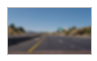

In [9]:
image = cf.baseOps.ColorImage()
image.value = frame

blur = cf.baseOps.Blur(image, ksize=129)
fig, ax = plt.subplots(figsize=(1.6, .9))
utils.show(blur.value, ax=ax), blur.value.shape

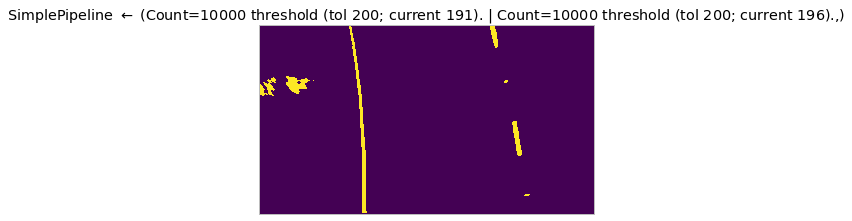

In [24]:
reload(cf)
reload(cf.misc)
reload(cf.baseOps)
reload(cf.compositeOps)

simplePipeline = cf.SimplePipeline()
simplePipeline(frame)

simplePipeline.showValue()

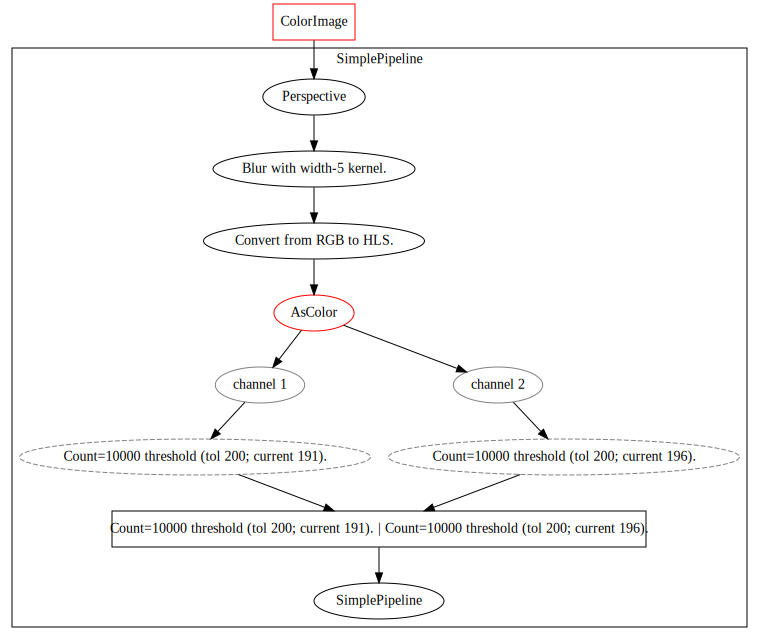

In [25]:
simplePipeline.draw()

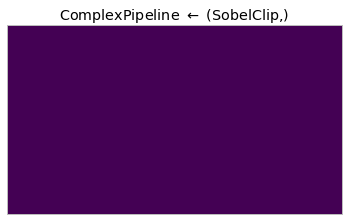

In [30]:
reload(cf)
reload(cf.misc)
reload(cf.baseOps)
reload(cf.compositeOps)

complexPipeline = cf.ComplexPipeline()
complexPipeline(frame)

complexPipeline.showValue()

Saved to /tmp/test.png.


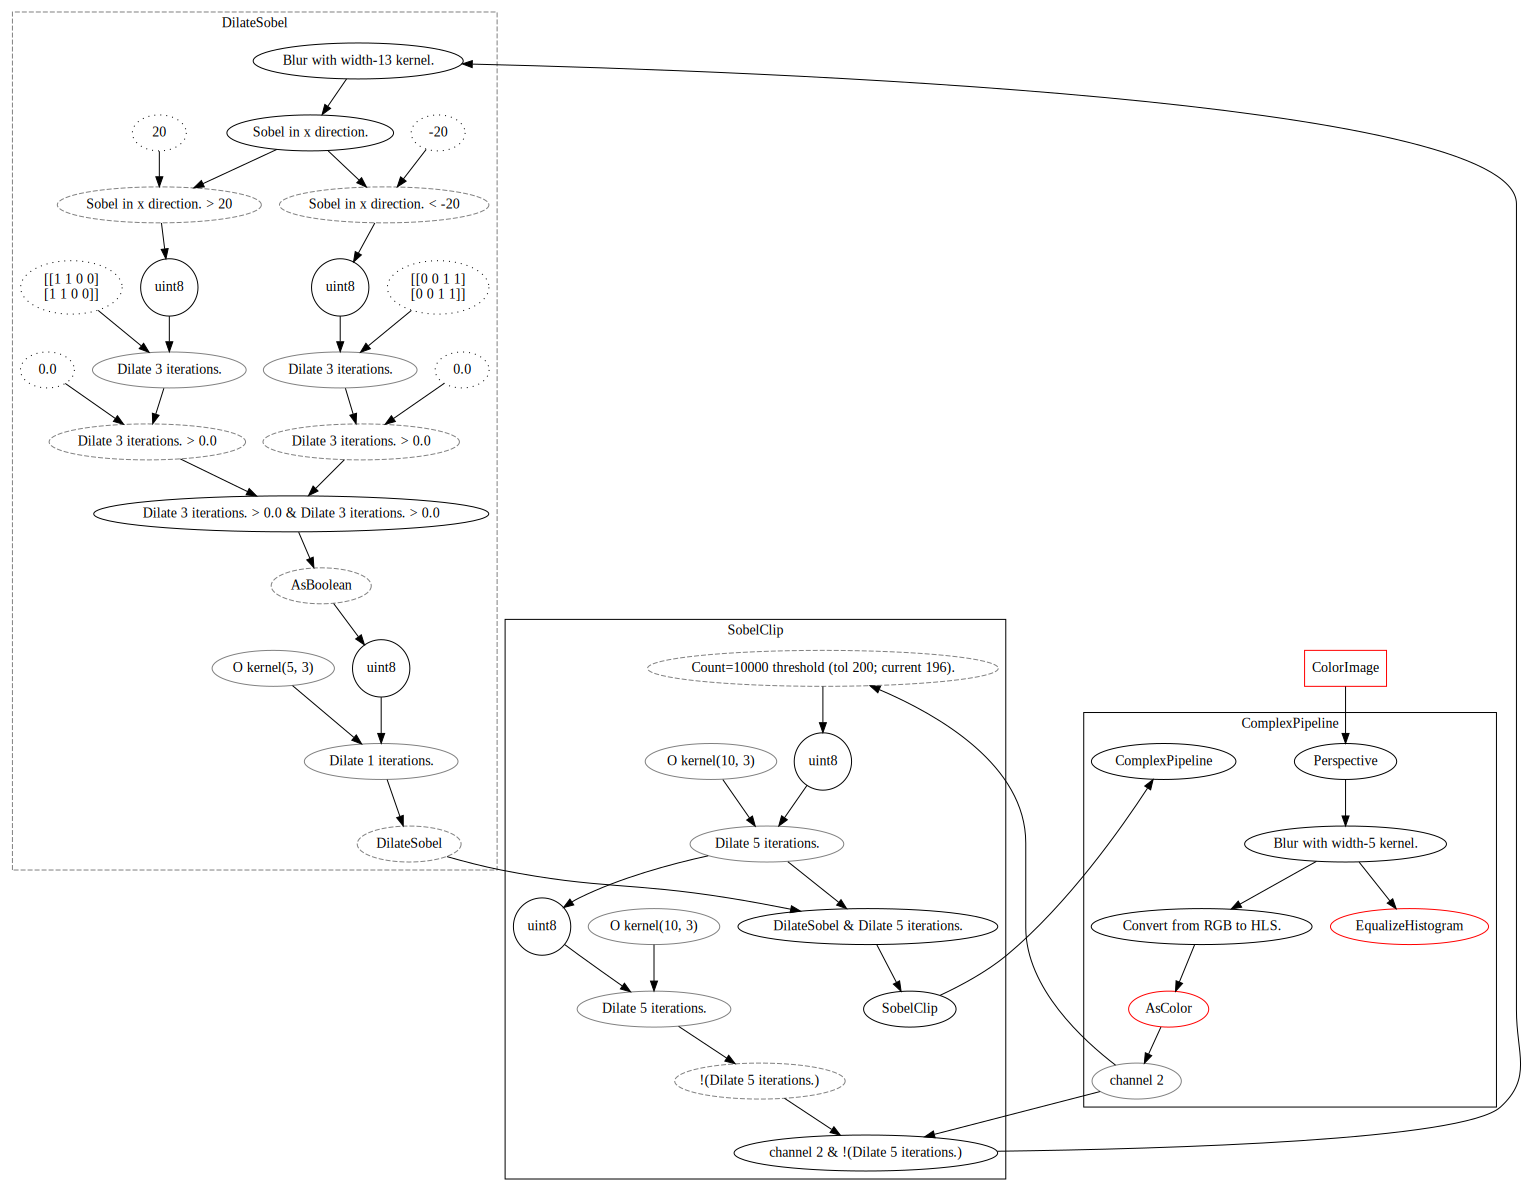

In [31]:
gv = complexPipeline.draw('/tmp/test')
gv